In [14]:
import numpy as np
import struct

def load_images(path):
    with open(path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols) / 255.0

def load_labels(path):
    with open(path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

# Load all datasets
X_train = load_images(r'C:\Users\adamy\OneDrive\Desktop\mnist classification\data\train-images.idx3-ubyte')
y_train = load_labels(r'C:\Users\adamy\OneDrive\Desktop\mnist classification\data\train-labels.idx1-ubyte')
X_test = load_images(r'C:\Users\adamy\OneDrive\Desktop\mnist classification\data\t10k-images.idx3-ubyte')
y_test = load_labels(r'C:\Users\adamy\OneDrive\Desktop\mnist classification\data\t10k-labels.idx1-ubyte')


In [15]:
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [24]:
class NeuralNet:
    def __init__(self, input_size, h1_size, h2_size, output_size):
        self.W1 = np.random.randn(input_size, h1_size) * 0.01
        self.b1 = np.zeros((1, h1_size))
        self.W2 = np.random.randn(h1_size, h2_size) * 0.01
        self.b2 = np.zeros((1, h2_size))
        self.W3 = np.random.randn(h2_size, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_deriv(self, Z):
        return Z > 0

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / np.sum(expZ, axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = self.relu(self.Z2)
        self.Z3 = self.A2 @ self.W3 + self.b3
        self.A3 = self.softmax(self.Z3)
        return self.A3

    def backward(self, X, y_true, y_pred, lr):
        m = X.shape[0]

        dZ3 = y_pred - y_true
        dW3 = self.A2.T @ dZ3 / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = dZ3 @ self.W3.T
        dZ2 = dA2 * self.relu_deriv(self.Z2)
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.relu_deriv(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= lr * dW1
        self.b1 -= lr * db1
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)  

In [17]:
model = NeuralNet(input_size=784, h1_size=128, h2_size=64, output_size=10)
epochs = 20
lr = 0.1
batch_size = 64

for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train_oh[permutation]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        y_pred = model.forward(X_batch)
        model.backward(X_batch, y_batch, y_pred, lr)

    y_pred_test = model.forward(X_test)
    acc = np.mean(np.argmax(y_pred_test, axis=1) == y_test)
    print(f"Epoch {epoch+1}, Test Accuracy: {acc:.4f}")


Epoch 1, Test Accuracy: 0.8810
Epoch 2, Test Accuracy: 0.9361
Epoch 3, Test Accuracy: 0.9580
Epoch 4, Test Accuracy: 0.9598
Epoch 5, Test Accuracy: 0.9652
Epoch 6, Test Accuracy: 0.9728
Epoch 7, Test Accuracy: 0.9736
Epoch 8, Test Accuracy: 0.9692
Epoch 9, Test Accuracy: 0.9773
Epoch 10, Test Accuracy: 0.9755
Epoch 11, Test Accuracy: 0.9719
Epoch 12, Test Accuracy: 0.9733
Epoch 13, Test Accuracy: 0.9783
Epoch 14, Test Accuracy: 0.9774
Epoch 15, Test Accuracy: 0.9797
Epoch 16, Test Accuracy: 0.9788
Epoch 17, Test Accuracy: 0.9789
Epoch 18, Test Accuracy: 0.9775
Epoch 19, Test Accuracy: 0.9788
Epoch 20, Test Accuracy: 0.9797


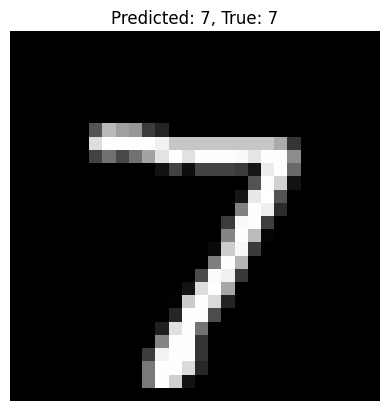

In [26]:
import matplotlib.pyplot as plt

def show_image(index):
    img = X_test[index].reshape(28, 28)
    pred = np.argmax(model.forward(X_test[index:index+1]))
    true = y_test[index]
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred}, True: {true}")
    plt.axis('off')
    plt.show()

show_image(0)
